# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [15]:
# Import numpy and pandas

import numpy as np
import pandas as pd



# Challenge 1 - Loading and Evaluating The Data

In this lab, we will look at a dataset of sensor data from a cellular phone. The phone was carried in the subject's pocket for a few minutes while they walked around.

To load the data, run the code below.

In [16]:
# Run this code:

sensor = pd.read_csv('../sub_1.csv')
sensor.drop(columns=['Unnamed: 0'], inplace=True)

Examine the data using the `head` function.

In [17]:
# Your code here:

sensor.head()

attitude.roll  attitude.pitch  attitude.yaw  gravity.x  gravity.y  \
0       1.528132       -0.733896      0.696372   0.741895   0.669768   
1       1.527992       -0.716987      0.677762   0.753099   0.657116   
2       1.527765       -0.706999      0.670951   0.759611   0.649555   
3       1.516768       -0.704678      0.675735   0.760709   0.647788   
4       1.493941       -0.703918      0.672994   0.760062   0.647210   

   gravity.z  rotationRate.x  rotationRate.y  rotationRate.z  \
0  -0.031672        0.316738        0.778180        1.082764   
1  -0.032255        0.842032        0.424446        0.643574   
2  -0.032707       -0.138143       -0.040741        0.343563   
3  -0.041140       -0.025005       -1.048717        0.035860   
4  -0.058530        0.114253       -0.912890        0.047341   

   userAcceleration.x  userAcceleration.y  userAcceleration.z  
0            0.294894           -0.184493            0.377542  
1            0.219405            0.035846            0.114866  
2            0.010714            0.134701           -0.167808  
3           -0.008389            0.136788            0.094958  
4            0.199441            0.353996           -0.044299

Check whether there is any missing data. If there is any missing data, remove the rows containing missing data.

In [18]:
# Your code here:

sensor.isnull().sum()


attitude.roll         0
attitude.pitch        0
attitude.yaw          0
gravity.x             0
gravity.y             0
gravity.z             0
rotationRate.x        0
rotationRate.y        0
rotationRate.z        0
userAcceleration.x    0
userAcceleration.y    0
userAcceleration.z    0
dtype: int64

How many rows and columns are in our data?

In [19]:
# Your code here:
sensor.shape


(1751, 12)

To perform time series analysis on the data, we must change the index from a range index to a time series index. In the cell below, create a time series index using the `pd.date_range` function. Create a time series index starting at 1/1/2018 00:00:00 and ending at 1/1/2018 00:29:10. The number of periods is equal to the number of rows in `sensor`. The frequency should be set to `infer`.

In [33]:
# Your code here:

sensor.date = pd.date_range(start = '1/1/2018 00:00:00', end = '1/1/2018 00:29:10', periods = len(sensor))


Assign the time series index to the dataframe's index.

In [34]:
# Your code here:

sensor.index = pd.DatetimeIndex(sensor.date, freq = 'infer')

sensor.index

sensor

attitude.roll  attitude.pitch  attitude.yaw  gravity.x  \
2018-01-01 00:00:00       1.528132       -0.733896      0.696372   0.741895   
2018-01-01 00:00:01       1.527992       -0.716987      0.677762   0.753099   
2018-01-01 00:00:02       1.527765       -0.706999      0.670951   0.759611   
2018-01-01 00:00:03       1.516768       -0.704678      0.675735   0.760709   
2018-01-01 00:00:04       1.493941       -0.703918      0.672994   0.760062   
...                            ...             ...           ...        ...   
2018-01-01 00:29:06       1.797120       -0.562324      2.445889   0.824443   
2018-01-01 00:29:07       1.814297       -0.569719      2.449655   0.817212   
2018-01-01 00:29:08       1.830821       -0.578367      2.447967   0.809207   
2018-01-01 00:29:09       1.849557       -0.586962      2.439458   0.800485   
2018-01-01 00:29:10       1.869375       -0.596783      2.433775   0.790551   

                     gravity.y  gravity.z  rotationRate.x  rotationRate.y  \
2018-01-01 00:00:00   0.669768  -0.031672        0.316738        0.778180   
2018-01-01 00:00:01   0.657116  -0.032255        0.842032        0.424446   
2018-01-01 00:00:02   0.649555  -0.032707       -0.138143       -0.040741   
2018-01-01 00:00:03   0.647788  -0.041140       -0.025005       -1.048717   
2018-01-01 00:00:04   0.647210  -0.058530        0.114253       -0.912890   
...                        ...        ...             ...             ...   
2018-01-01 00:29:06   0.533154   0.189844       -0.123211        0.909536   
2018-01-01 00:29:07   0.539396   0.203020       -0.057641        0.723118   
2018-01-01 00:29:08   0.546658   0.215288        0.343238        0.997236   
2018-01-01 00:29:09   0.553834   0.229110        0.470144        1.227937   
2018-01-01 00:29:10   0.561984   0.243315        0.291873        1.102207   

                     rotationRate.z  userAcceleration.x  userAcceleration.y  \
2018-01-01 00:00:00        1.082764            0.294894           -0.184493   
2018-01-01 00:00:01        0.643574            0.219405            0.035846   
2018-01-01 00:00:02        0.343563            0.010714            0.134701   
2018-01-01 00:00:03        0.035860           -0.008389            0.136788   
2018-01-01 00:00:04        0.047341            0.199441            0.353996   
...                             ...                 ...                 ...   
2018-01-01 00:29:06       -0.379757           -0.268367            0.006733   
2018-01-01 00:29:07       -0.437812           -0.102444           -0.060666   
2018-01-01 00:29:08       -0.338155           -0.085590           -0.030209   
2018-01-01 00:29:09       -0.332223           -0.048105            0.029555   
2018-01-01 00:29:10       -0.436925           -0.065011           -0.042575   

                     userAcceleration.z  
2018-01-01 00:00:00            0.377542  
2018-01-01 00:00:01            0.114866  
2018-01-01 00:00:02           -0.167808  
2018-01-01 00:00:03            0.094958  
2018-01-01 00:00:04           -0.044299  
...                                 ...  
2018-01-01 00:29:06           -0.064874  
2018-01-01 00:29:07           -0.229738  
2018-01-01 00:29:08           -0.087740  
2018-01-01 00:29:09            0.060441  
2018-01-01 00:29:10            0.046052  

[1751 rows x 12 columns]

Our next step is to decompose the time series and evaluate the patterns in the data. Load the `statsmodels.api` submodule and plot the decomposed plot of `userAcceleration.x`. Set `freq=60` in the `seasonal_decompose` function. Your graph should look like the one below.

![time series decomposition](../images/tsa_decompose.png)

Figure(432x288)


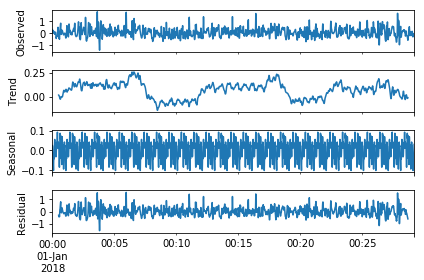

In [44]:
# Your code here:

import statsmodels.api as sm

res = sm.tsa.seasonal_decompose(sensor['userAcceleration.x'], freq=60)

print(res.plot())



Figure(432x288)


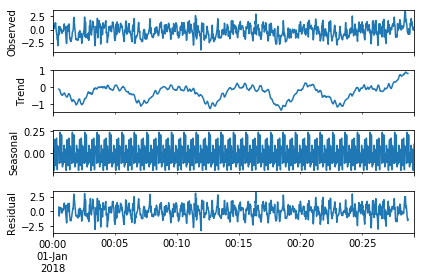

In [46]:
res = sm.tsa.seasonal_decompose(sensor['rotationRate.x'], freq=60)

print(res.plot())


Plot the decomposed time series of `rotationRate.x` also with a frequency of 60.

# Challenge 2 - Modelling the Data

To model our data, we should look at a few assumptions. First, let's plot the `lag_plot` to detect any autocorrelation. Do this for `userAcceleration.x`

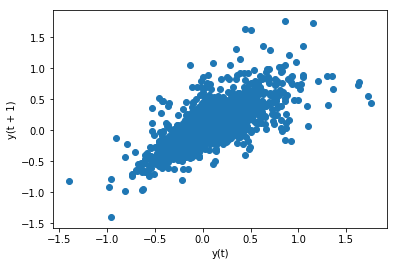

In [51]:
# Your code here:

lag = pd.plotting.lag_plot(sensor['userAcceleration.x'], lag=1, ax=None)


Create a lag plot for `rotationRate.x`

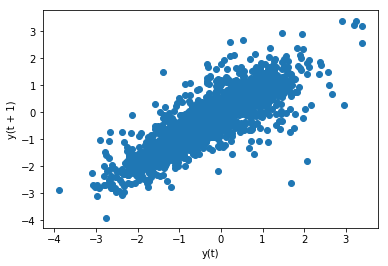

In [52]:
# Your code here:

lag = pd.plotting.lag_plot(sensor['rotationRate.x'], lag=1, ax=None)


What are your conclusions from both visualizations?

In [11]:
# Your conclusions here:

# It has a positive correlation


The next step will be to test both variables for stationarity. Perform the Augmented Dickey Fuller test on both variables below.

In [69]:
# Your code here:

from statsmodels.tsa.stattools import adfuller
 
adf_test = adfuller(sensor['userAcceleration.x'])
adf_test 

adf_test1 = adfuller(sensor['rotationRate.x'])
adf_test1

print("userAcceleration.x p-value = " + str(adf_test[1]))
print("rotationRate.x p-value = " + str(adf_test1[1]))

adf_test

userAcceleration.x p-value = 2.82343948304e-30
rotationRate.x p-value = 6.32023033591e-06


(-17.957994086169702,
 2.823439483037563e-30,
 4,
 1746,
 {'1%': -3.4341008247600708,
  '5%': -2.8631967801292229,
  '10%': -2.5676520210882936},
 -727.61401244027911)

What are your conclusions from this test?

In [13]:
# Your conclusions here:



Finally, we'll create an ARMA model for `userAcceleration.x`. Load the `ARMA` function from `statsmodels`. The order of the model is (2, 1). Split the data to train and test. Use the last 10 observations as the test set and all other observations as the training set. 

In [90]:
# Your code here:
from statsmodels.tsa.arima_model import ARMA
train=sensor['userAcceleration.x'][:-10]
test=sensor['userAcceleration.x'][-10:]
model=ARMA(train, order=(2, 1))
model_fit = model.fit(disp=False)
predictions_ARMA = model_fit.predict(len(train), len(train)+len(test)-1)



In [92]:
sensor[-15:]

attitude.roll  attitude.pitch  attitude.yaw  gravity.x  \
2018-01-01 00:28:56       1.334520       -0.534949      2.643867   0.836392   
2018-01-01 00:28:57       1.422465       -0.538370      2.607585   0.849118   
2018-01-01 00:28:58       1.495848       -0.534125      2.567471   0.858298   
2018-01-01 00:28:59       1.562207       -0.535579      2.539257   0.859942   
2018-01-01 00:29:00       1.602650       -0.537863      2.508996   0.858370   
2018-01-01 00:29:01       1.634509       -0.539902      2.480230   0.856019   
2018-01-01 00:29:02       1.671799       -0.541547      2.463982   0.852545   
2018-01-01 00:29:03       1.707251       -0.545910      2.455201   0.846711   
2018-01-01 00:29:04       1.739734       -0.551012      2.445058   0.839866   
2018-01-01 00:29:05       1.771197       -0.555716      2.441679   0.832521   
2018-01-01 00:29:06       1.797120       -0.562324      2.445889   0.824443   
2018-01-01 00:29:07       1.814297       -0.569719      2.449655   0.817212   
2018-01-01 00:29:08       1.830821       -0.578367      2.447967   0.809207   
2018-01-01 00:29:09       1.849557       -0.586962      2.439458   0.800485   
2018-01-01 00:29:10       1.869375       -0.596783      2.433775   0.790551   

                     gravity.y  gravity.z  rotationRate.x  rotationRate.y  \
2018-01-01 00:28:56   0.509797  -0.201381        2.110466        4.515475   
2018-01-01 00:28:57   0.512738  -0.126882        1.934159        4.615807   
2018-01-01 00:28:58   0.509088  -0.064449        1.565820        4.607298   
2018-01-01 00:28:59   0.510339  -0.007386        1.085954        3.586802   
2018-01-01 00:29:00   0.512302   0.027351        1.421727        2.425178   
2018-01-01 00:29:01   0.514052   0.054613        1.065054        2.373071   
2018-01-01 00:29:02   0.515462   0.086403        0.497726        2.192886   
2018-01-01 00:29:03   0.519196   0.116260        0.426906        1.919032   
2018-01-01 00:29:04   0.523550   0.143251        0.414523        1.851654   
2018-01-01 00:29:05   0.527551   0.169107        0.027461        1.528635   
2018-01-01 00:29:06   0.533154   0.189844       -0.123211        0.909536   
2018-01-01 00:29:07   0.539396   0.203020       -0.057641        0.723118   
2018-01-01 00:29:08   0.546658   0.215288        0.343238        0.997236   
2018-01-01 00:29:09   0.553834   0.229110        0.470144        1.227937   
2018-01-01 00:29:10   0.561984   0.243315        0.291873        1.102207   

                     rotationRate.z  userAcceleration.x  userAcceleration.y  \
2018-01-01 00:28:56       -0.713811           -0.191617           -0.085954   
2018-01-01 00:28:57       -0.076370           -0.081173            0.064335   
2018-01-01 00:28:58       -0.027662            0.033395            0.000708   
2018-01-01 00:28:59       -0.153619            0.028120           -0.157311   
2018-01-01 00:29:00       -0.060055            0.140211           -0.197971   
2018-01-01 00:29:01       -0.040047            0.149749           -0.137389   
2018-01-01 00:29:02       -0.042711            0.038461           -0.045660   
2018-01-01 00:29:03       -0.227657           -0.169175           -0.000015   
2018-01-01 00:29:04       -0.150745           -0.300361            0.030939   
2018-01-01 00:29:05       -0.287630           -0.270174            0.096304   
2018-01-01 00:29:06       -0.379757           -0.268367            0.006733   
2018-01-01 00:29:07       -0.437812           -0.102444           -0.060666   
2018-01-01 00:29:08       -0.338155           -0.085590           -0.030209   
2018-01-01 00:29:09       -0.332223           -0.048105            0.029555   
2018-01-01 00:29:10       -0.436925           -0.065011           -0.042575   

                     userAcceleration.z      ARMA  
2018-01-01 00:28:56            0.759807       NaN  
2018-01-01 00:28:57            0.590216       NaN  
2018-01-01 00:28:58            0.159557       NaN  
2018-01-01 00:28:59           -0.091475       NaN 

In [93]:
pd.DataFrame({
    "test": test,
    "prediction":predictions_ARMA
})

test  prediction
2018-01-01 00:29:01  0.149749    0.173148
2018-01-01 00:29:02  0.038461    0.142896
2018-01-01 00:29:03 -0.169175    0.100522
2018-01-01 00:29:04 -0.300361    0.070106
2018-01-01 00:29:05 -0.270174    0.056099
2018-01-01 00:29:06 -0.268367    0.053778
2018-01-01 00:29:07 -0.102444    0.056790
2018-01-01 00:29:08 -0.085590    0.060646
2018-01-01 00:29:09 -0.048105    0.063316
2018-01-01 00:29:10 -0.065011    0.064493

To compare our predictions with the observed data, we can compute the RMSE (Root Mean Squared Error) from the submodule `statsmodels.tools.eval_measures`. You can read more about this function [here](https://www.statsmodels.org/dev/generated/statsmodels.tools.eval_measures.rmse.html). Compute the RMSE for the last 10 rows of the data by comparing the observed and predicted data for the `userAcceleration.x` column.

In [98]:
# Your code here:

from statsmodels.tools.eval_measures import rmse

rmse(test,predictions_ARMA)

0.22529863649048862